# Additional Datasets

*   Bus Stop Data: fname1 = "Bus_Stop_Shelter.csv" stored as dataframe df1
*   WiFi Hotspot Data: fname2 = "nyc-wi-fi-hotspot-locations.csv" stored as dataframe df2

*   Subway Entrance Data: fname3 = "DOITT_SUBWAY_ENTRANCE_01_13SEPT2010.csv" stored as dataframe df3
*   _




In [0]:
# MAIN LIBRARIES
import pandas as pd
import numpy as np
from os.path import join

# VISUAL LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import HeatMap


In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive/"

Mounted at /content/drive


# **Transportation**

## Bus Stop Data

This dataset contains the location of Bus Stop Shelters. Taken from NYC open Data


In [0]:
fname1 = "Bus_Stop_Shelter.csv"
df1 = pd.read_csv(join(path_prefix, fname1))

df1.head()

,CounDist,BoroCD,AssemDist,the_geom,CongDist,StSenDist,SHELTER_ID,LOCATION,AT_BETWEEN,LONGITUDE,LATITUDE,AssetID,BoroCode,BoroName,Street,SegmentID,PhysicalID,NODEID
0,34,301,53,POINT (-73.94783099999995 40.70681200000007),7,18,BR0003,MONTROSE AV,LORIMER ST,-73.947831,40.706812,1,3,Brooklyn,MONTROSE AVENUE,31244.0,91546,0
1,34,301,50,POINT (-73.94516199999998 40.71909700000003),12,18,BR0014,GRAHAM AV,HERBERT ST,-73.945162,40.719097,2,3,Brooklyn,GRAHAM AVENUE,35598.0,45754,0
2,34,301,53,POINT (-73.94578299999995 40.702976000000035),7,18,BR0026,BROADWAY,LEONARD ST,-73.945783,40.702976,3,3,Brooklyn,BROADWAY,31350.0,43972,19920
3,34,301,50,POINT (-73.94083599999993 40.72019500000005),12,18,BR0028,KINGSLAND AV,HERBERT ST,-73.940836,40.720195,4,3,Brooklyn,KINGSLAND AVENUE,65844.0,48893,40551
4,35,302,50,POINT (-73.96979499999998 40.69344000000007),8,25,BR0040,VANDERBILT AV,MYRTLE AV,-73.969795,40.693440,5,3,Brooklyn,VANDERBILT AVENUE,30196.0,60512,0


In [0]:
# Checking the shape of the dataset (rows, cols)
df1.shape

(3428, 18)

In [0]:
# Showing the datatypes of the columns

In [0]:
df1.dtypes

CounDist        int64
BoroCD          int64
AssemDist       int64
the_geom       object
CongDist        int64
StSenDist       int64
SHELTER_ID     object
LOCATION       object
AT_BETWEEN     object
LONGITUDE     float64
LATITUDE      float64
AssetID         int64
BoroCode        int64
BoroName       object
Street         object
SegmentID     float64
PhysicalID      int64
NODEID          int64
dtype: object



### Data Pre-processing

We will convert the data into appropriate data for analysis by

*   Dropping Na values
*   Dropping unecessary columns













We don't have to play with the data too much because we will only use the locations of the bus stops.

So the important parts of the data are the longitudes, latitudes, boro names, and street names.

But we will get rid of the NaN values

In [0]:
# Show the percentage of NaN values in each column.
df1.isnull().sum()

CounDist      0
BoroCD        0
AssemDist     0
the_geom      0
CongDist      0
StSenDist     0
SHELTER_ID    0
LOCATION      0
AT_BETWEEN    0
LONGITUDE     0
LATITUDE      0
AssetID       0
BoroCode      0
BoroName      0
Street        4
SegmentID     4
PhysicalID    0
NODEID        0
dtype: int64

In [0]:
df1 = df1.dropna()

df1.isnull().sum()

CounDist      0
BoroCD        0
AssemDist     0
the_geom      0
CongDist      0
StSenDist     0
SHELTER_ID    0
LOCATION      0
AT_BETWEEN    0
LONGITUDE     0
LATITUDE      0
AssetID       0
BoroCode      0
BoroName      0
Street        0
SegmentID     0
PhysicalID    0
NODEID        0
dtype: int64

### Explatory Data Analysis

In [0]:
df1.BoroName.unique()

array(['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten Island'],
      dtype=object)

In [0]:
df1.Street.unique()

array(['MONTROSE AVENUE', 'GRAHAM AVENUE', 'BROADWAY', 'KINGSLAND AVENUE',
       'VANDERBILT AVENUE', 'ATLANTIC AVENUE', 'CADMAN PLAZA WEST',
       'LIVINGSTON STREET', 'TOMPKINS AVENUE', 'TROY AVENUE',
       'FULTON STREET', 'MYRTLE AVENUE', 'WILSON AVENUE', 'KOSSUTH PLACE',
       'PALMETTO STREET', 'GATES AVENUE', '60 STREET', 'BAY PARKWAY',
       'BAY RIDGE PARKWAY', '14 AVENUE', 'NEPTUNE AVENUE',
       'CONEY ISLAND AVENUE', 'NOSTRAND AVENUE', 'KINGS HIGHWAY',
       'AVENUE U', 'GERRITSEN AVENUE', 'ST JOHNS PLACE', 'SUTTER AVENUE',
       'PENNSYLVANIA AVENUE', 'AVENUE Z', 'EMPIRE BOULEVARD',
       'NEW LOTS AVENUE', 'DUMONT AVENUE', 'JAMAICA AVENUE',
       'GLENWOOD ROAD', 'RALPH AVENUE', 'FLATLANDS AVENUE',
       'EMMONS AVENUE', 'DRIGGS AVENUE', 'METROPOLITAN AVENUE',
       'DEKALB AVENUE', 'BERGEN STREET', 'KINGSTON AVENUE',
       '4 AVENUE LINE', 'GRANT AVENUE', 'CRESCENT STREET', 'SANDS STREET',
       '7 AVENUE', 'AVENUE M', 'CHURCH AVENUE', 'FOSTER AVENUE',
    

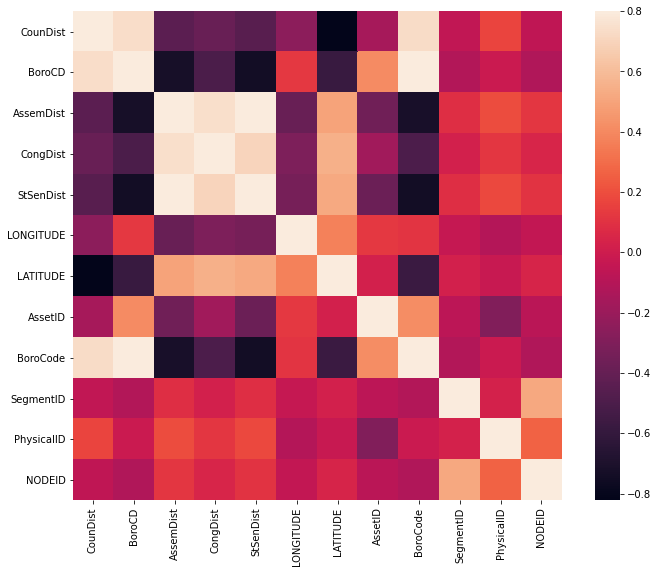

In [0]:
# heat map of correlation of features

correlation_matrix = df1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

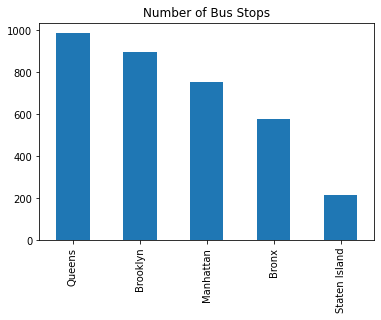

In [0]:
df1_BoroDist = df1.BoroName.value_counts()

df1_BoroDist.plot(kind="bar", title = "Number of Bus Stops")

plt.show()

In [0]:
lat = df1["LATITUDE"].mean()
lng = df1["LONGITUDE"].mean()

busMap = folium.Map(location=[lat, lng], zoom_start=12, tiles = "Stamen Terrain")

locs = df1[["LATITUDE", "LONGITUDE"]].values

for i in locs:
  folium.CircleMarker(location=i, radius=3, color="black").add_to(busMap)

busMap

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# heatmap

lat = df1["LATITUDE"].mean()
lng = df1["LONGITUDE"].mean()

busBaseMap = folium.Map(location=[lat, lng], zoom_start=12, tiles = "Stamen Terrain")

HeatMap(data = df1[["LATITUDE", "LONGITUDE"]].groupby(["LATITUDE", "LONGITUDE"]).sum().reset_index().values.tolist(), radius = 8, max_zoom = 13).add_to(busBaseMap)

busBaseMap

## Subway Entrance Data

This dataset contains the locations of Subway Entrances. Taken from NYC open data.

In [0]:
fname3 = "DOITT_SUBWAY_ENTRANCE_01_13SEPT2010.csv"
df3 = pd.read_csv(join(path_prefix, fname3))

df3.head()

,OBJECTID,URL,NAME,the_geom,LINE
0,1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),2-5
1,1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),2-5
2,1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),2-5
3,1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.8728919997833 40.84145300067447),2-5
4,1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,POINT (-73.87962300013866 40.84081500075867),2-5


In [0]:
df3.shape

(1928, 5)

In [0]:
df3.dtypes

OBJECTID     int64
URL         object
NAME        object
the_geom    object
LINE        object
dtype: object

### Data Pre-Processing

We will deal with NaN values, drop unnecessary columns and create columns for latitude and longitude

In [0]:
df3.isnull().sum()

OBJECTID     0
URL          0
NAME        29
the_geom     0
LINE         0
dtype: int64

In [0]:
df3 = df3.dropna()
df3.isnull().sum()

OBJECTID    0
URL         0
NAME        0
the_geom    0
LINE        0
dtype: int64

In [0]:
df3 = df3.drop(columns = "URL")
df3.head(2)

,OBJECTID,NAME,the_geom,LINE
0,1734,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),2-5
1,1735,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),2-5


In [0]:
# Create latitude and longitude columns

def latitude(r):
  r["Latitude"] = r["the_geom"][0]




df3["Latitude"] = 0
df3["Longitude"] = 0

df3.apply(latitude, 0)

KeyError: ignored

# WIFI Hotspot Locations

The dataset consists of records for every public WiFi hotspot (ones provided by or in partnership with the city) in New York City. It contains over 2500 records overall.

This dataset was published as-is by the New York City Department of Information Technology & Telecommunications.

In [0]:
fname2 = "nyc-wi-fi-hotspot-locations.csv"
df2 = pd.read_csv(join(path_prefix, fname2))

df2.head()

In [0]:
df2.shape

In [0]:
df2.describe()

In [0]:
df2.dtypes

### Data Pre-Processing

We will convert the data into appropriate data for analysis by

*   Dropping Na values
*   Dropping unecessary columns
*   Converting data types
*   Creating new columns if necessary

This dataset can show us a good insight on whether the listing location popularity is effected by the wifi hotspots or not.


#### Converting to Datetime object

We will change the datatytpe of "Activated" to datetime for convenience




In [0]:
df2["Activated"] = pd.to_datetime(df2["Activated"], errors = "coerce")
# If there are some wrong formatted data, we set them to null by the statement errors = "coerce"

df2.dtypes

#### Dealing With NaN Values

In [0]:
df2.isnull().sum()

In [0]:
# We wont drop all the NaN values to not loose a large portion of our data. 
# Dropping rows that the only NAN value is Remarks should suffice since the other columns
# are not that important to us.

df2 = df2.dropna(subset=["Remarks"])

df2.isnull().sum()

In [0]:
# We dont need "Location (Lat, Long)" column since we have the same information in diffrenet columns
# This is just a duplicate

df2 = df2.drop(columns = "Location (Lat, Long)")
df2.head(2)

We dont need to do any more data manipulation or add colums.

## Explanatory Data Analysis

### Extracting Insights

First, lets see the number of hotspot locations in each Borough

In [0]:
df2['BoroName'].value_counts().plot.bar()

plt.show()

#### Types of Hotspots

Now to see the service type (free or not) we plot a pie chart

In [0]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
ax = df2.groupby(by = "Type").size().plot(ax = axes, kind= "pie", title = "Percentage of the Hotspot Types", autopct='%1.1f%%', label="")
plt.show()

##### **buna bak**

Combining the two informations from before, we will look at the number of free hotspots in each borough

In [0]:
# NAsıl yapcaz bunu???

g = sns.catplot(x="BoroName", hue="Free", col="Type",
                data=df2, kind="count",
                height=4, aspect=.7)

#### Heatmap

In [0]:
lat = df2["Latitude"].mean()
lng = df2["Longitude"].mean()

wifiBaseMap = folium.Map(location=[lat, lng], zoom_start=12, tiles = "Stamen Terrain")

HeatMap(data = df2[["Latitude", "Longitude"]].groupby(["Latitude", "Longitude"]).sum().reset_index().values.tolist(), radius = 8, max_zoom = 13).add_to(wifiBaseMap)

wifiBaseMap